# Intro to keras
    - Load MNIST dataset
    - Linear model
    - Convolutional model

In [1]:
from __future__ import print_function

#Basic libraries
import numpy as np
import keras
print('Keras version: ', keras.__version__)

import time

#Show images
import matplotlib.pyplot as plt
%matplotlib inline
# plt configuration
plt.rcParams['figure.figsize'] = (10, 10)        # size of images
plt.rcParams['image.interpolation'] = 'nearest'  # show exact image
plt.rcParams['image.cmap'] = 'gray'  # use grayscale 


Using TensorFlow backend.


Keras version:  1.2.0


In [2]:
# Control GPU resources in tensorflow

# GPU visibles for python
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


# Limit memory usage
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14353024555488891288
, name: "/gpu:0"
device_type: "GPU"
memory_limit: 7875726541
locality {
  bus_id: 1
}
incarnation: 9665299261329247272
physical_device_desc: "device: 0, name: TITAN X (Pascal), pci bus id: 0000:05:00.0"
]


## Get some data

In [3]:
# Import mnist dataset and rescale between [0,1]
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

print('X train shape: ',X_train.shape)
print('y train shape: ',y_train.shape)
print('X test shape: ', X_test.shape)
print('y test shape: ', y_test.shape)

X train shape:  (60000, 28, 28)
y train shape:  (60000,)
X test shape:  (10000, 28, 28)
y test shape:  (10000,)


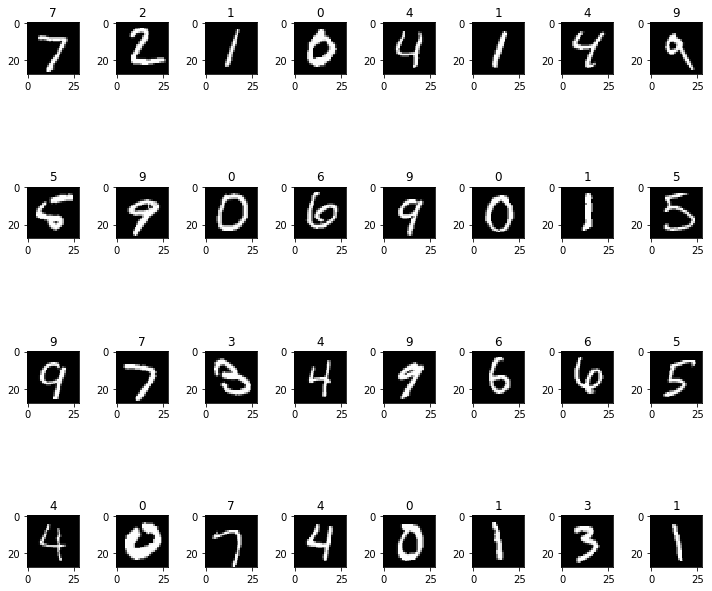

In [4]:
#Examine the data
fig = plt.figure()
for n, i in enumerate(range(32)): 
    a = fig.add_subplot(4,8,n+1)
    a.set_title(str(y_test[i]))
    fig.tight_layout()
    plt.imshow(X_test[i])
    

## Linear model

In [5]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense

print('Linear model...')
images = Input(batch_shape=(None, 28, 28), dtype='float32', name='Images') 
flat = Flatten(name='Flat_image')(images)
output = Dense(10, activation='softmax', name='Dense_output')(flat)

# Model Architecture defined
model_linear = Model(input=images, output=output)
model_linear.summary()


Linear model...
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Images (InputLayer)              (None, 28, 28)        0                                            
____________________________________________________________________________________________________
Flat_image (Flatten)             (None, 784)           0           Images[0][0]                     
____________________________________________________________________________________________________
Dense_output (Dense)             (None, 10)            7850        Flat_image[0][0]                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
____________________________________________________________________________________________________


In [6]:
# Compile model and select optimizer
from keras.optimizers import sgd

sgd_optimizer = sgd(lr=0.01)
model_linear.compile(loss='sparse_categorical_crossentropy', 
                     optimizer=sgd_optimizer, metrics=['accuracy'])

In [7]:
# Train the model
batch_size = 128
epochs = 50

start = time.time()
history_linear = model_linear.fit(X_train, y_train, batch_size=batch_size, nb_epoch=epochs,
                                  verbose=1, validation_data=(X_test, y_test))
print('Seconds to train: ', time.time() - start)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s - loss: 1.2949 - acc: 0.6885 - val_loss: 0.8180 - val_acc: 0.8262
Epoch 2/50
60000/60000 [==============================] - 1s - loss: 0.7193 - acc: 0.8392 - val_loss: 0.6104 - val_acc: 0.8579
Epoch 3/50
60000/60000 [==============================] - 1s - loss: 0.5887 - acc: 0.8577 - val_loss: 0.5277 - val_acc: 0.8719
Epoch 4/50
60000/60000 [==============================] - 1s - loss: 0.5264 - acc: 0.8678 - val_loss: 0.4818 - val_acc: 0.8789
Epoch 5/50
60000/60000 [==============================] - 1s - loss: 0.4885 - acc: 0.8737 - val_loss: 0.4517 - val_acc: 0.8850
Epoch 6/50
60000/60000 [==============================] - 1s - loss: 0.4625 - acc: 0.8785 - val_loss: 0.4302 - val_acc: 0.8895
Epoch 7/50
60000/60000 [==============================] - 1s - loss: 0.4432 - acc: 0.8827 - val_loss: 0.4142 - val_acc: 0.8917
Epoch 8/50
60000/60000 [==============================] - 1s 

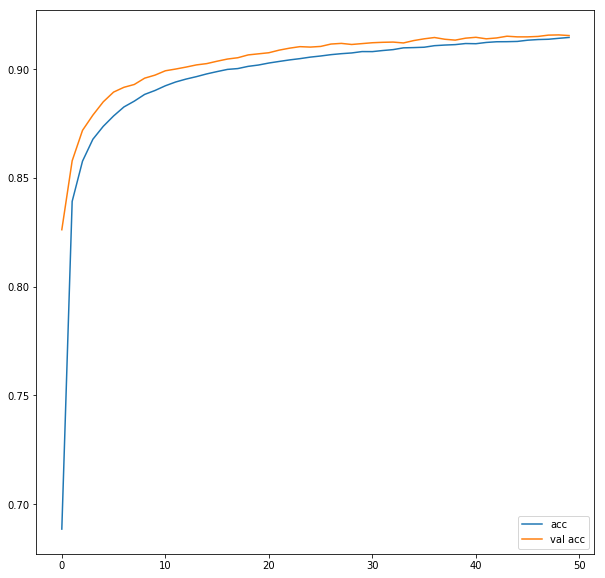

In [8]:
plt.plot(history_linear.history['acc'], label='acc')
plt.plot(history_linear.history['val_acc'], label='val acc')
plt.legend(loc='lower right')
plt.show()

## Neural network model 

In [9]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense

print('NN model...')
images = Input(batch_shape=(None, 28, 28), dtype='float32', name='Images') 
flat = Flatten(name='Flat_image')(images)

dense = Dense(500, activation='relu', name='Dense_layer')(flat)

output = Dense(10, activation='softmax', name='Dense_output')(dense)

# Model Architecture defined
model_nn = Model(input=images, output=output)
model_nn.summary()


NN model...
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Images (InputLayer)              (None, 28, 28)        0                                            
____________________________________________________________________________________________________
Flat_image (Flatten)             (None, 784)           0           Images[0][0]                     
____________________________________________________________________________________________________
Dense_layer (Dense)              (None, 500)           392500      Flat_image[0][0]                 
____________________________________________________________________________________________________
Dense_output (Dense)             (None, 10)            5010        Dense_layer[0][0]                
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_______

In [10]:
sgd_optimizer = sgd(lr=0.01)
model_nn.compile(loss='sparse_categorical_crossentropy', 
                 optimizer=sgd_optimizer, metrics=['accuracy'])


In [11]:
# Train the model
batch_size = 128
epochs = 50

start = time.time()
history_nn = model_nn.fit(X_train, y_train,
                    batch_size=batch_size, nb_epoch=epochs,
                    verbose=1, validation_data=(X_test, y_test))
print('Seconds to train: ', time.time() - start)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s - loss: 1.1156 - acc: 0.7545 - val_loss: 0.6004 - val_acc: 0.8679
Epoch 2/50
60000/60000 [==============================] - 1s - loss: 0.5220 - acc: 0.8737 - val_loss: 0.4320 - val_acc: 0.8939
Epoch 3/50
60000/60000 [==============================] - 1s - loss: 0.4193 - acc: 0.8902 - val_loss: 0.3712 - val_acc: 0.9029
Epoch 4/50
60000/60000 [==============================] - 1s - loss: 0.3726 - acc: 0.8996 - val_loss: 0.3384 - val_acc: 0.9092
Epoch 5/50
60000/60000 [==============================] - 1s - loss: 0.3439 - acc: 0.9057 - val_loss: 0.3165 - val_acc: 0.9134
Epoch 6/50
60000/60000 [==============================] - 1s - loss: 0.3234 - acc: 0.9104 - val_loss: 0.3005 - val_acc: 0.9174
Epoch 7/50
60000/60000 [==============================] - 1s - loss: 0.3076 - acc: 0.9144 - val_loss: 0.2874 - val_acc: 0.9198
Epoch 8/50
60000/60000 [==============================] - 1s 

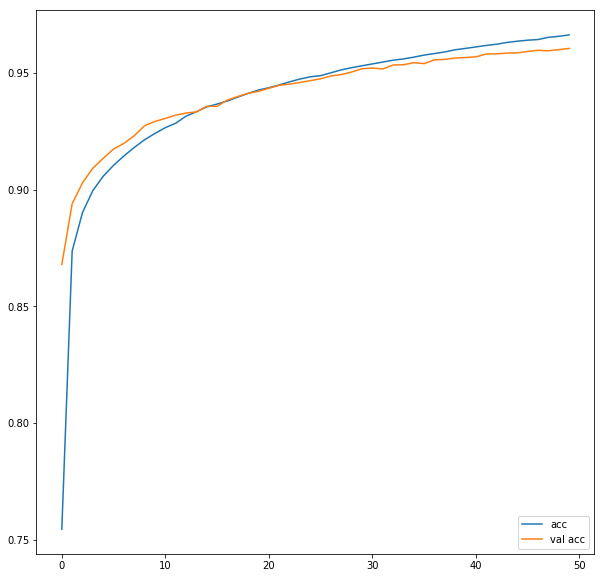

In [12]:
plt.plot(history_nn.history['acc'], label='acc')
plt.plot(history_nn.history['val_acc'], label='val acc')
plt.legend(loc='lower right')
plt.show()

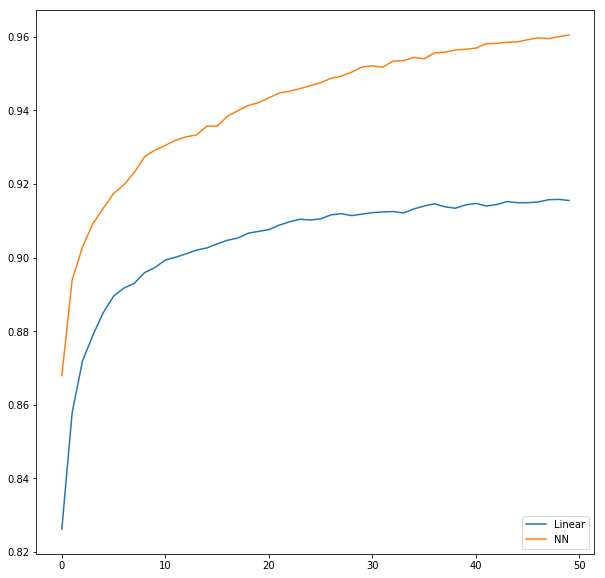

In [13]:
# Compare the two models
plt.plot(history_linear.history['val_acc'], label='Linear')
plt.plot(history_nn.history['val_acc'], label='NN')
plt.legend(loc='lower right')
plt.show()

## Convolutional model

In [14]:
from keras.layers import Conv2D


In [15]:
#Define the model

from keras.models import Model
from keras.layers import Input, Flatten, Dense, Convolution2D, Reshape, MaxPooling2D, Dropout
from keras.optimizers import sgd

print('Convolutional model...')
print('LeNet architecture.')

#Inputs
images = Input(batch_shape=(None, 28, 28, 1), dtype='float32', name='Images') #"image_dim_ordering": "tf"
#images = Input(batch_shape=(None, 1, 28, 28), dtype='float32', name='Images') #"image_dim_ordering": "th"

#First convolutional layer
conv1 = Convolution2D(20, 5, 5)(images)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

#Second convolutional layer
conv2 = Convolution2D(20, 5, 5)(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

#Flatten convolution output
flat = Flatten(name='Flat_image')(pool2)

# First dense layer
dense1 = Dense(500, activation='relu', name='Dense_1')(flat)

# Second dense layer
output = Dense(10, activation='softmax', name='Dense_output')(dense1)

# Model Architecture defined
model_conv = Model(input=images, output=output)
model_conv.summary()


Convolutional model...
LeNet architecture.
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Images (InputLayer)              (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 24, 24, 20)    520         Images[0][0]                     
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 12, 12, 20)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 8, 8, 20)      10020       maxpooling2d_1[0][0]             
________________________________________________

In [16]:
# Compile model and select optimizer
sgd_optimizer = sgd(lr=0.01, momentum=0.99, decay=0.005, nesterov=True)
model_conv.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])


In [17]:
# Train the model
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) #"image_dim_ordering": "tf"
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
#X_train = X_train.reshape(X_train.shape[0], 1, 28, 28) # "image_dim_ordering": "th"
#X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

batch_size = 256
epochs = 10

start = time.time()
history = model_conv.fit(X_train, y_train,
                    batch_size=batch_size, nb_epoch=epochs,
                    verbose=1, validation_data=(X_test, y_test))
print('Seconds to train: ', time.time() - start)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s - loss: 0.4640 - acc: 0.8773 - val_loss: 0.0834 - val_acc: 0.9720
Epoch 2/10
60000/60000 [==============================] - 1s - loss: 0.0738 - acc: 0.9779 - val_loss: 0.0598 - val_acc: 0.9811
Epoch 3/10
60000/60000 [==============================] - 1s - loss: 0.0419 - acc: 0.9873 - val_loss: 0.0424 - val_acc: 0.9872
Epoch 4/10
60000/60000 [==============================] - 1s - loss: 0.0274 - acc: 0.9916 - val_loss: 0.0413 - val_acc: 0.9872
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 0.0216 - acc: 0.9934 - val_loss: 0.0374 - val_acc: 0.9894
Epoch 6/10
60000/60000 [==============================] - 1s - loss: 0.0165 - acc: 0.9949 - val_loss: 0.0391 - val_acc: 0.9889
Epoch 7/10
60000/60000 [==============================] - 1s - loss: 0.0132 - acc: 0.9962 - val_loss: 0.0381 - val_acc: 0.9894
Epoch 8/10
60000/60000 [==============================] - 1s 

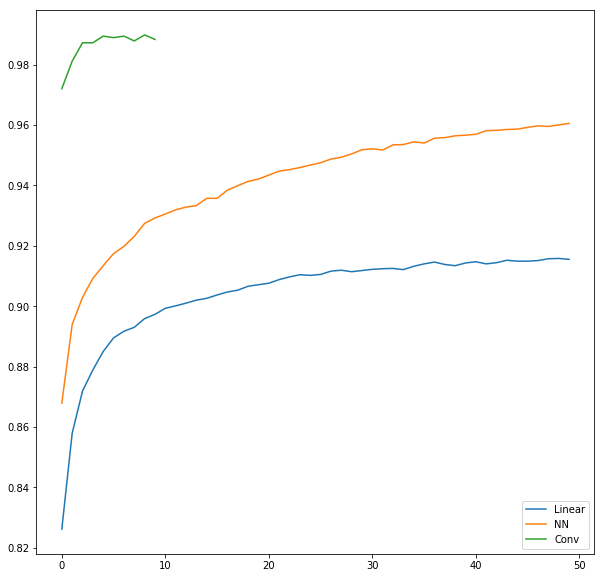

In [18]:
#Compare with previous
# Compare the two models
plt.plot(history_linear.history['val_acc'], label='Linear')
plt.plot(history_nn.history['val_acc'], label='NN')
plt.plot(history.history['val_acc'], label='Conv')
plt.legend(loc='lower right')
plt.show()


In [19]:
# Score and select prediction with max prob
import numpy as np
pred_test = np.argmax(model_conv.predict(X_test), axis=1)

#Evaluate the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_test))

[[ 973    0    0    0    0    0    1    2    4    0]
 [   0 1128    1    2    0    1    1    1    1    0]
 [   1    1 1023    2    1    0    1    3    0    0]
 [   0    0    1  999    0    3    0    3    0    4]
 [   0    1    1    0  975    0    1    2    1    1]
 [   1    0    0    8    0  878    1    1    2    1]
 [   3    1    0    1    1    6  946    0    0    0]
 [   0    2    4    0    0    0    0 1020    0    2]
 [   2    0    3    6    0    2    0    1  956    4]
 [   0    0    1    6    6    5    1    5    0  985]]


Num errors:  117


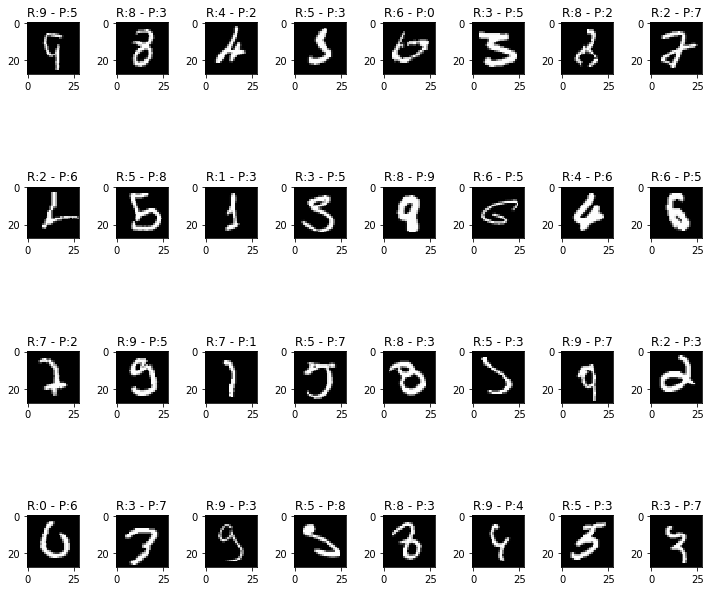

In [20]:


#Cumulate errors
test_errors=[]
test_errors_real=[]
test_errors_predict=[]
for i in range(len(pred_test)):
    if pred_test[i] != y_test[i]: #Error!
        test_errors += [X_test[i,:,:,0]]
        test_errors_real += [y_test[i]]
        test_errors_predict += [pred_test[i]]  
print("Num errors: ", len(test_errors))


#Plot 32 images wrong classified.
fig = plt.figure()
for n, i in enumerate(range(32)): 
    a = fig.add_subplot(4,8,n+1)
    a.set_title('R:'+str(test_errors_real[i])+' - P:'+str(test_errors_predict[i]))
    fig.tight_layout()
    plt.imshow(test_errors[i])
    